In [1]:
import pandas as pd
import numpy as np

In [2]:
weather=pd.read_csv("data/weather.csv")

weather

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [3]:
weather.shape

(366, 22)

In [4]:
pd.melt(weather,id_vars=['MinTemp'])

,MinTemp,variable,value
0,8.0,MaxTemp,24.3
1,14.0,MaxTemp,26.9
2,13.7,MaxTemp,23.4
3,13.3,MaxTemp,15.5
4,7.6,MaxTemp,16.1
...,...,...,...
7681,9.0,RainTomorrow,No
7682,7.1,RainTomorrow,No
7683,12.5,RainTomorrow,No
7684,12.5,RainTomorrow,No


In [5]:
weather_melt=pd.melt(weather,id_vars=['MinTemp'],var_name='mixed_lable',value_name='Points')
weather_melt.head()

,MinTemp,mixed_lable,Points
0,8.0,MaxTemp,24.3
1,14.0,MaxTemp,26.9
2,13.7,MaxTemp,23.4
3,13.3,MaxTemp,15.5
4,7.6,MaxTemp,16.1


In [6]:
weather_melt['Points'].fillna(0, inplace=True)

C:\Users\vinod\AppData\Local\Temp\ipykernel_25988\762725956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather_melt['Points'].fillna(0, inplace=True)


In [7]:
weather_melt.pivot_table(index=['MinTemp'], columns='mixed_lable', values='Points', aggfunc='sum').reset_index()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [16]:
temp=weather.head()
temp.to_csv('output/weatherhead.csv')

In [15]:
import os as os
os.mkdir('output')


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'output'

In [17]:
temp.to_excel('output/head_weather.xlsx')

![![image.png](https://)](attachment:image.png)
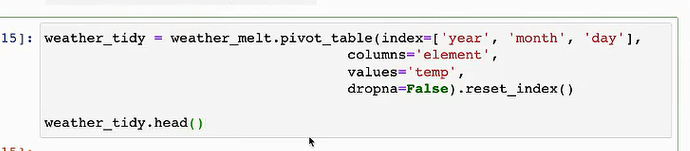

In [23]:
weather[(weather.MinTemp>16.1) & (weather.MinTemp<17)]['Rainfall']

21     0.4
32     0.2
35     0.0
37     4.0
64     0.0
67     0.0
68     0.0
96     9.0
112    1.8
337    0.0
Name: Rainfall, dtype: float64

In [25]:
weather_DF=pd.read_csv('data/Weather_india.csv')

weather_DF

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [41]:
def mean_fun(x):
    return sum(x)/len(x)

In [46]:
weather_DF[['APR','DEC']].apply(mean_fun)

APR    26.514103
DEC    19.173333
dtype: float64

In [11]:
import random as rd
idlst=list()
for i in range(10):
    idlst.append(rd.randint(1,100))
nlst=list()
for i in range(10):
    nlst.append(f"Test User {i}")


In [12]:
users=pd.DataFrame(
    {'id':idlst ,
     'name': nlst
    }
)

users

,id,name
0,90,Test User 0
1,84,Test User 1
2,43,Test User 2
3,38,Test User 3
4,33,Test User 4
5,94,Test User 5
6,23,Test User 6
7,83,Test User 7
8,24,Test User 8
9,28,Test User 9


In [15]:
users=pd.DataFrame(
    {
        'userid':[1,2,3],
        'msg': ['A','B','C']
    }
)

In [21]:
msgs=pd.DataFrame(
    {
        'id':[1,1,3],
        'msg': ['hello','bye','bi']
    }
)
msgs

,id,msg
0,1,hello
1,1,bye
2,3,bi


In [22]:
users.merge(msgs,left_on='userid',right_on='id')

,userid,msg_x,id,msg_y
0,1,A,1,hello
1,1,A,1,bye
2,3,C,3,bi


In [44]:
d=np.random.randint(10,100,size=(4,4))

df=pd.DataFrame(data=d) ## convert numpy to dataframe
df.values ## dataframe to numpy 
df.keys() ## columsn are keys so will disply columns

RangeIndex(start=0, stop=4, step=1)

In [45]:
df

,0,1,2,3
0,21,42,16,68
1,17,29,84,51
2,44,15,85,61
3,20,66,93,36


In [50]:
df[4]=[1,2,3,4]

In [54]:
df

,0,1,2,3,4,4
0,21,42,16,68,58,1
1,17,29,84,51,113,2
2,44,15,85,61,100,3
3,20,66,93,36,159,4


In [59]:
df.keys()

Index([0, 1, 2, 3, '4', 4], dtype='object')

In [63]:
df[4]=df[1]+df[2]

In [65]:
df.drop(columns=['4'],axis=0)

,0,1,2,3,4
0,21,42,16,68,58
1,17,29,84,51,113
2,44,15,85,61,100
3,20,66,93,36,159


In [66]:
df

,0,1,2,3,4,4
0,21,42,16,68,58,58
1,17,29,84,51,113,113
2,44,15,85,61,100,100
3,20,66,93,36,159,159


In [69]:
df=df.drop(columns=['4'],axis=0)

In [70]:
df.keys()

Index([0, 1, 2, 3, 4], dtype='object')

In [71]:
df.values

array([[ 21,  42,  16,  68,  58],
       [ 17,  29,  84,  51, 113],
       [ 44,  15,  85,  61, 100],
       [ 20,  66,  93,  36, 159]], dtype=int32)